In [1]:
!date
!pwd

Втр Янв 24 17:24:07 MSK 2017
/home/sphere/github/Sphere/SelectEAS


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import math as mt
import numpy as np

### Чтение данных

In [3]:
# чтение данных обработки экспериментальных событий как сигнала
rsignal = pd.read_csv('Result-Signal', index_col=0, sep='\s+')
print('events as signal:', len(rsignal))

# чтение данных обработки экспериментальных событий как шума
rnoise = pd.read_csv('Result-Noise', index_col=0, sep='\s+')
print('events as noise :', len(rnoise))

# слияние массивов
all=pd.merge(rsignal,rnoise,  suffixes=('_s','_n'), left_index=True, right_index=True, how='outer')
print('events in total :',len(all))
all[:3]

events as signal: 1911
events as noise : 1911
events in total : 1911


,SNRatio_s,AbsSignal_s,TotalNoise_s,NNear3,Theta,dt2_s,ng_s,SNRatio_n,AbsSignal_n,TotalNoise_n,dt2_n,ng_n
nev,,,,,,,,,,,,
10675,107.21170,381.888,3.562,31,0.204204,0.766965,34,37.680380,375.485,9.965,1.802776,32
10677,13.49221,719.364,53.317,51,0.486947,1.157275,56,0.497918,249.740,501.569,1.519109,13
10679,0.10180,61.124,600.431,9,1.193805,2.939874,14,0.077615,218.918,2820.565,1.058301,25


In [27]:
# чтение событий ШАЛ 
dima = pd.read_csv('namesEAS', header = 0, index_col=0, sep='\s+')
#dima = pd.read_csv('timur2013.csv', header = 0, index_col=2, sep='\s+')
eas  = pd.core.frame.DataFrame(dima, columns=['EAS'])
eas['EAS'] = int(1)
# добавляем признак ШАЛ к данным
data=all.join(eas)
# заменяем NAN на 0
data.fillna(0, inplace=True)
param=['EAS','SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
data = data[param]
print('EAS: ', len(data[data['EAS']>0]))
data[:3]

EAS:  462


,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n
nev,,,,,,,,,,,,,
10675,1.0,107.21170,37.680380,381.888,375.485,3.562,9.965,31,0.204204,0.766965,1.802776,34,32
10677,1.0,13.49221,0.497918,719.364,249.740,53.317,501.569,51,0.486947,1.157275,1.519109,56,13
10679,0.0,0.10180,0.077615,61.124,218.918,600.431,2820.565,9,1.193805,2.939874,1.058301,14,25


 ### Простроение производных критериев

In [28]:
#Crit1 = NGood_s/NGood_n  *  Dt2_n/Dt2_s
data['Crit1'] = 10
data['Crit1'] = (data['ng_s']/data['ng_n'])  *  (data['dt2_n']/data['dt2_s'])
data=data.replace([np.inf, -np.inf], np.nan)
data.fillna(10, inplace=True)

#Crit2 = Noise_n/Noise_s  *  Signal_s/Signal_n
data['Crit2'] = (data['TotalNoise_n']/data['TotalNoise_s'])  *  (data['AbsSignal_s']/data['AbsSignal_n'])
data=data.replace([np.inf, -np.inf], np.nan)
data.fillna(1000, inplace=True)

data[data['Crit1']< 0.01]

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
nev,,,,,,,,,,,,,,,
10837,0.0,1.055363,0.291550,26.859,11.076,25.450,37.990,0,0.204204,1.000000,0.0,4,1,0.0,3.619832
10867,0.0,1.928841,0.000000,42.882,0.000,22.232,36.469,1,0.769690,2.000000,0.0,6,-1,-0.0,1000.000000
10914,0.0,1.063736,0.000000,49.318,0.000,46.363,130.863,2,0.769690,2.449490,0.0,7,-1,-0.0,1000.000000
10915,0.0,2.309445,0.000000,64.482,0.000,27.921,38.127,0,0.581195,1.549193,0.0,5,-1,-0.0,1000.000000
10934,0.0,0.899823,0.000000,40.097,0.000,44.561,24.414,1,0.565487,2.000000,0.0,6,-1,-0.0,1000.000000
10946,0.0,1.388321,0.294423,52.566,18.503,37.863,62.845,2,0.942478,2.236068,0.0,6,1,0.0,4.715399
11004,0.0,1.683143,0.000000,42.666,0.000,25.349,31.020,1,0.219911,0.707107,0.0,4,-1,-0.0,1000.000000
11186,1.0,37.086290,0.000000,140.965,0.000,3.801,118.098,2,0.486947,2.449490,0.0,9,-1,-0.0,1000.000000
11382,1.0,12.832990,0.824236,264.706,120.139,20.627,145.758,11,0.235619,0.801784,0.0,14,4,0.0,15.569552


## Построение распределений критериев для всех событий

In [97]:
# кадры с большой суммой сигнала
all=data
len(all[:][all['AbsSignal_s'] > 5000])

11

In [98]:
# Посмотрим на кадр 11048: в нем суммарный сигнал очень большой (дверь)
all[all['AbsSignal_s']> 100000]

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
nev,,,,,,,,,,,,,,,
11048,0.0,30.78734,0.0234,133382.3,33.064,4332.375,1413.01,3,1.083849,2.0,0.816497,12,6,0.816497,1315.715539


In [99]:
#Выбросим кадр 11048: он заведомо шумовой, в нём суммарный сигнал очень большой (дверь)
show=data[data['AbsSignal_s'] < 100000]
len(show)

1910

In [102]:
# 12 параметров
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n'] 
param=['SNRatio_s','SNRatio_n','AbsSignal_s','AbsSignal_n','TotalNoise_s','TotalNoise_n','NNear3','Theta','dt2_s','dt2_n','ng_s','ng_n', 'Crit1', 'Crit2'] 
len(param)

14

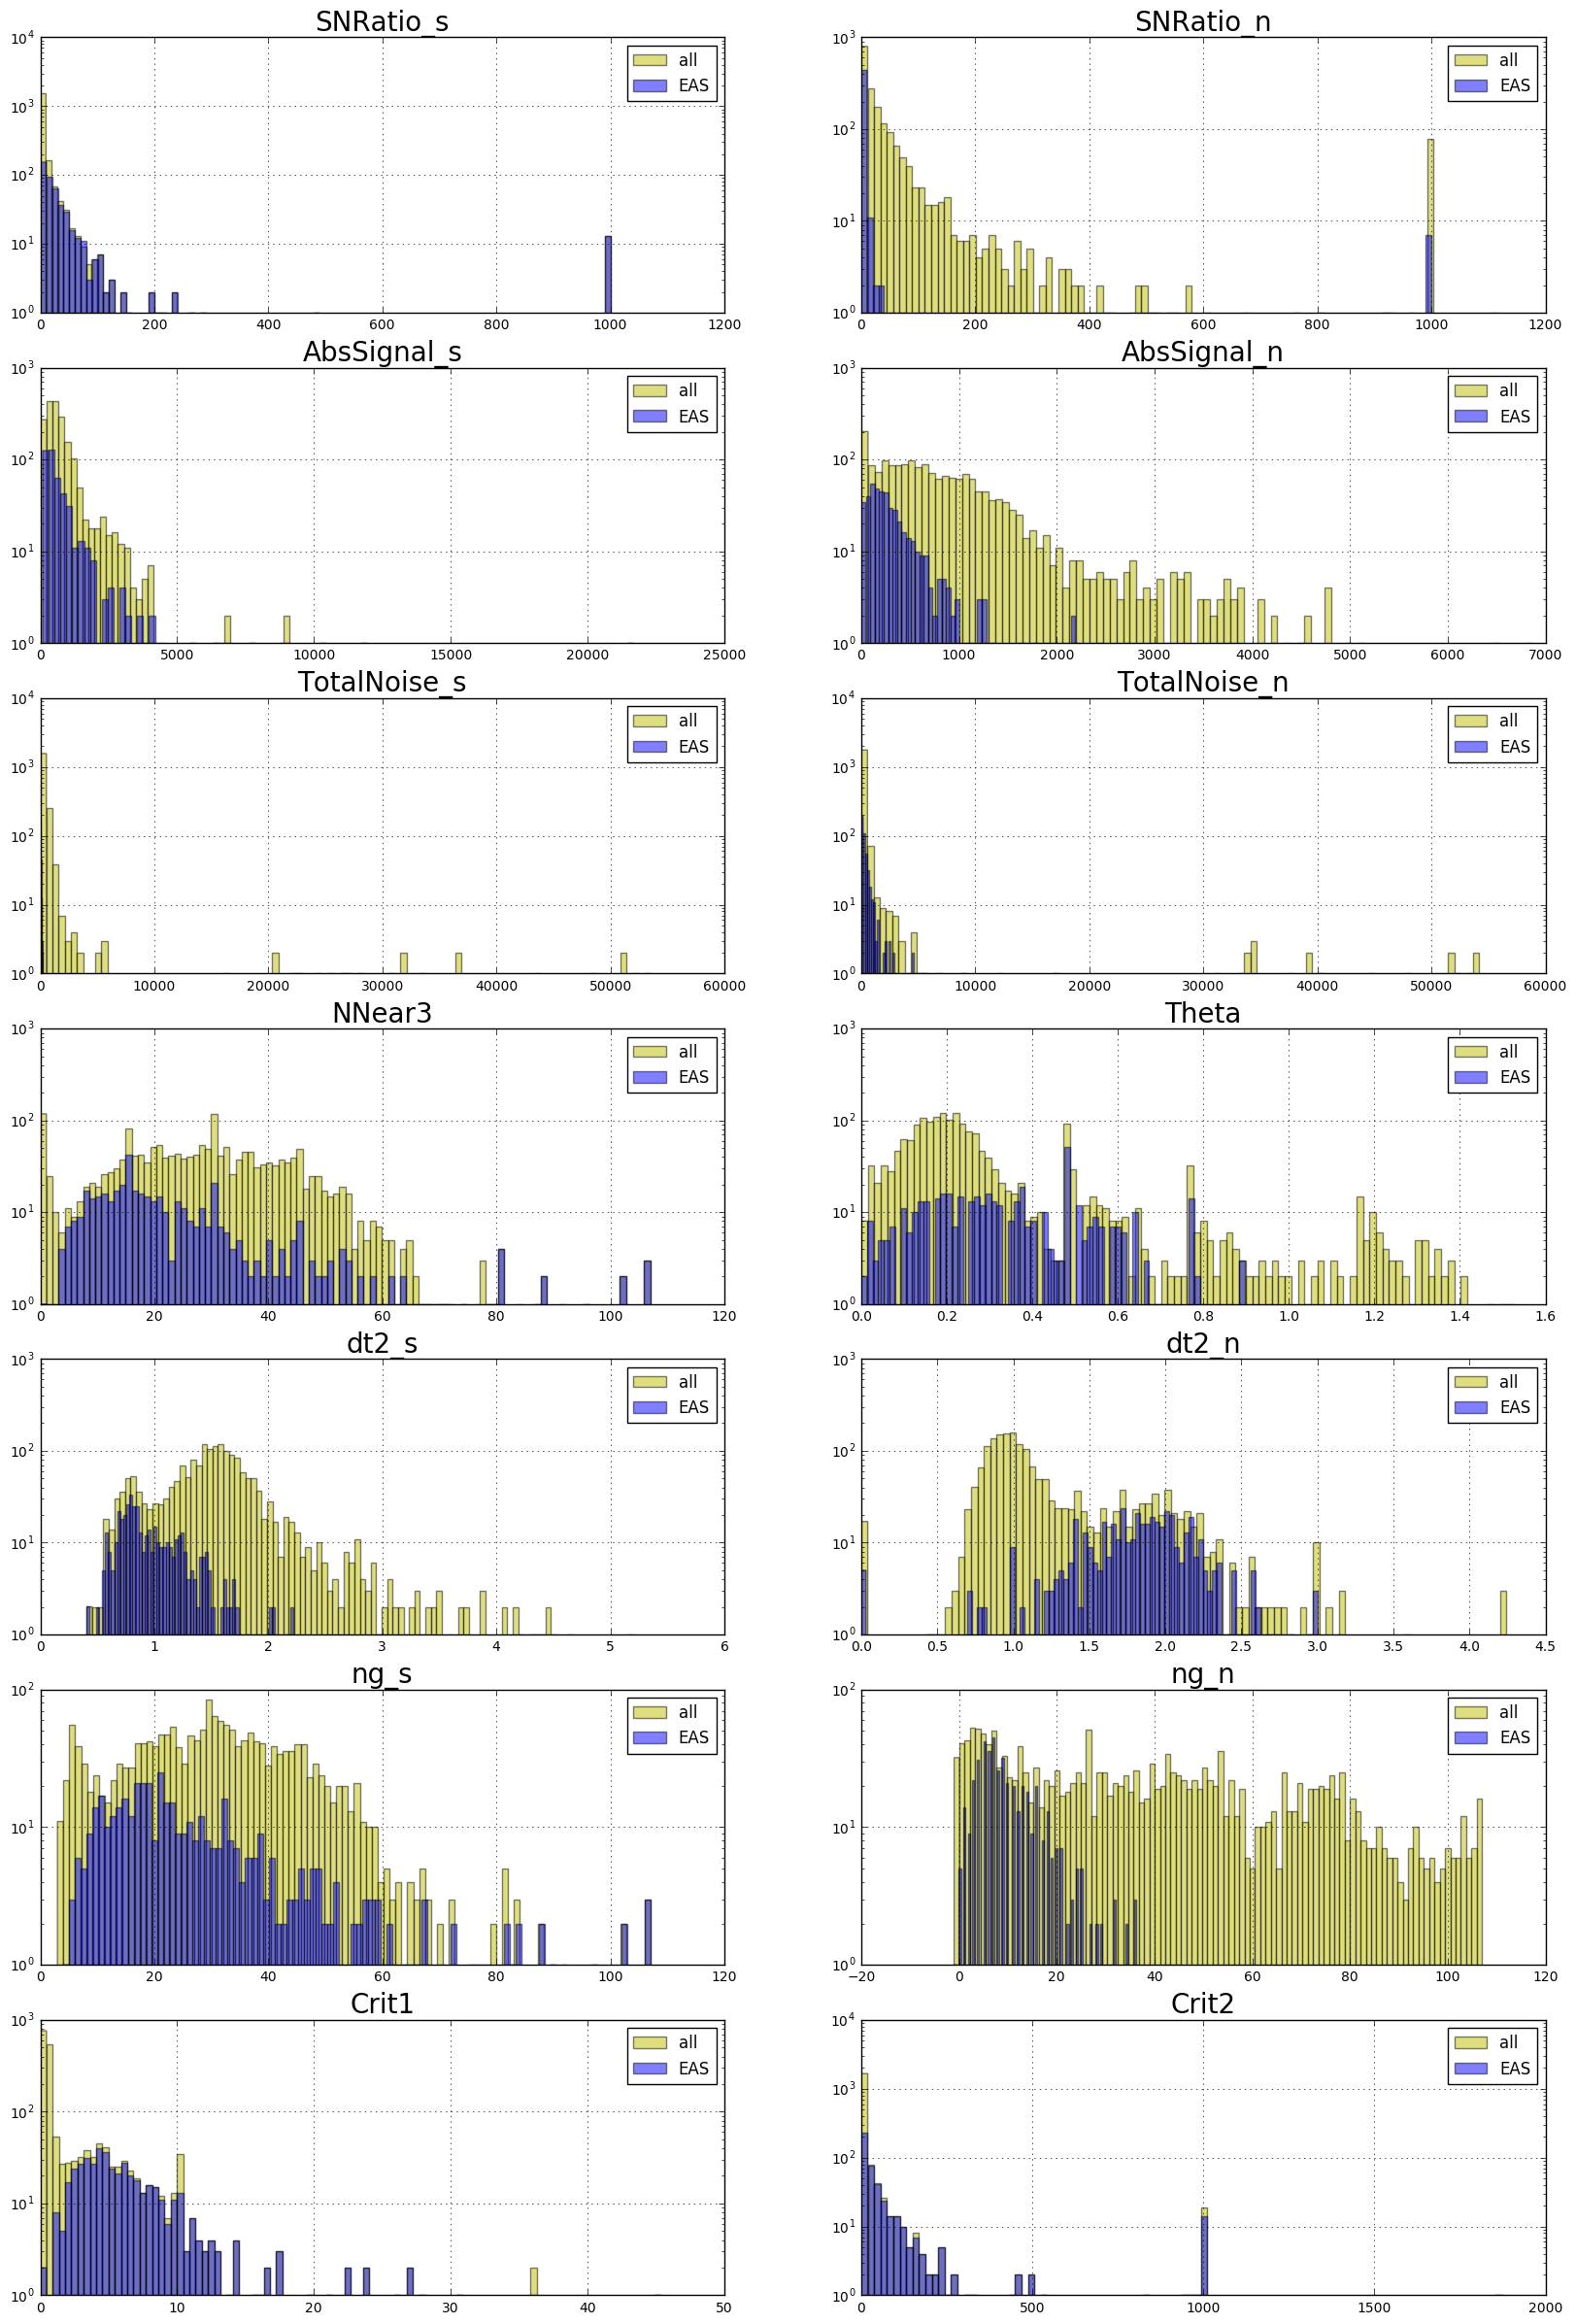

In [103]:
plt.figure(figsize=(20,30))
for i in range(len(param)):
    plt.subplot(7,2,1+i)
    plt.hist(show[param[i]],                 bins = 100, alpha = 0.5, color = 'y', label=r"all")#, normed=True)
    plt.hist(show[param[i]][show['EAS']==1], bins = 100, alpha = 0.5, color = 'b', label=r"EAS")#, normed=True)
    plt.title(param[i], size = 20)
    plt.legend(loc=1)
    plt.yscale('log')
    plt.grid()

# Попарные распределения по признакам

In [175]:
param = ['EAS', 'Crit1', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'Crit2'] #,'SNRatio_n']
features = param [1:]

In [177]:
# удалим выбросы, мешающие рассмотреть распределения параметров
six = data[param][data['SNRatio_s'] < 120]
#six = six[six['AbsSignal_n'] < 6000]
six = six[six['Crit2'] < 700]
six = six[six['dt2_n'] < 3.5]

Xset = six[features]
Yset = six['EAS']
print('all:',len(Xset))
print('EAS:',len(Xset[Yset==1]))

all: 1871
EAS: 432


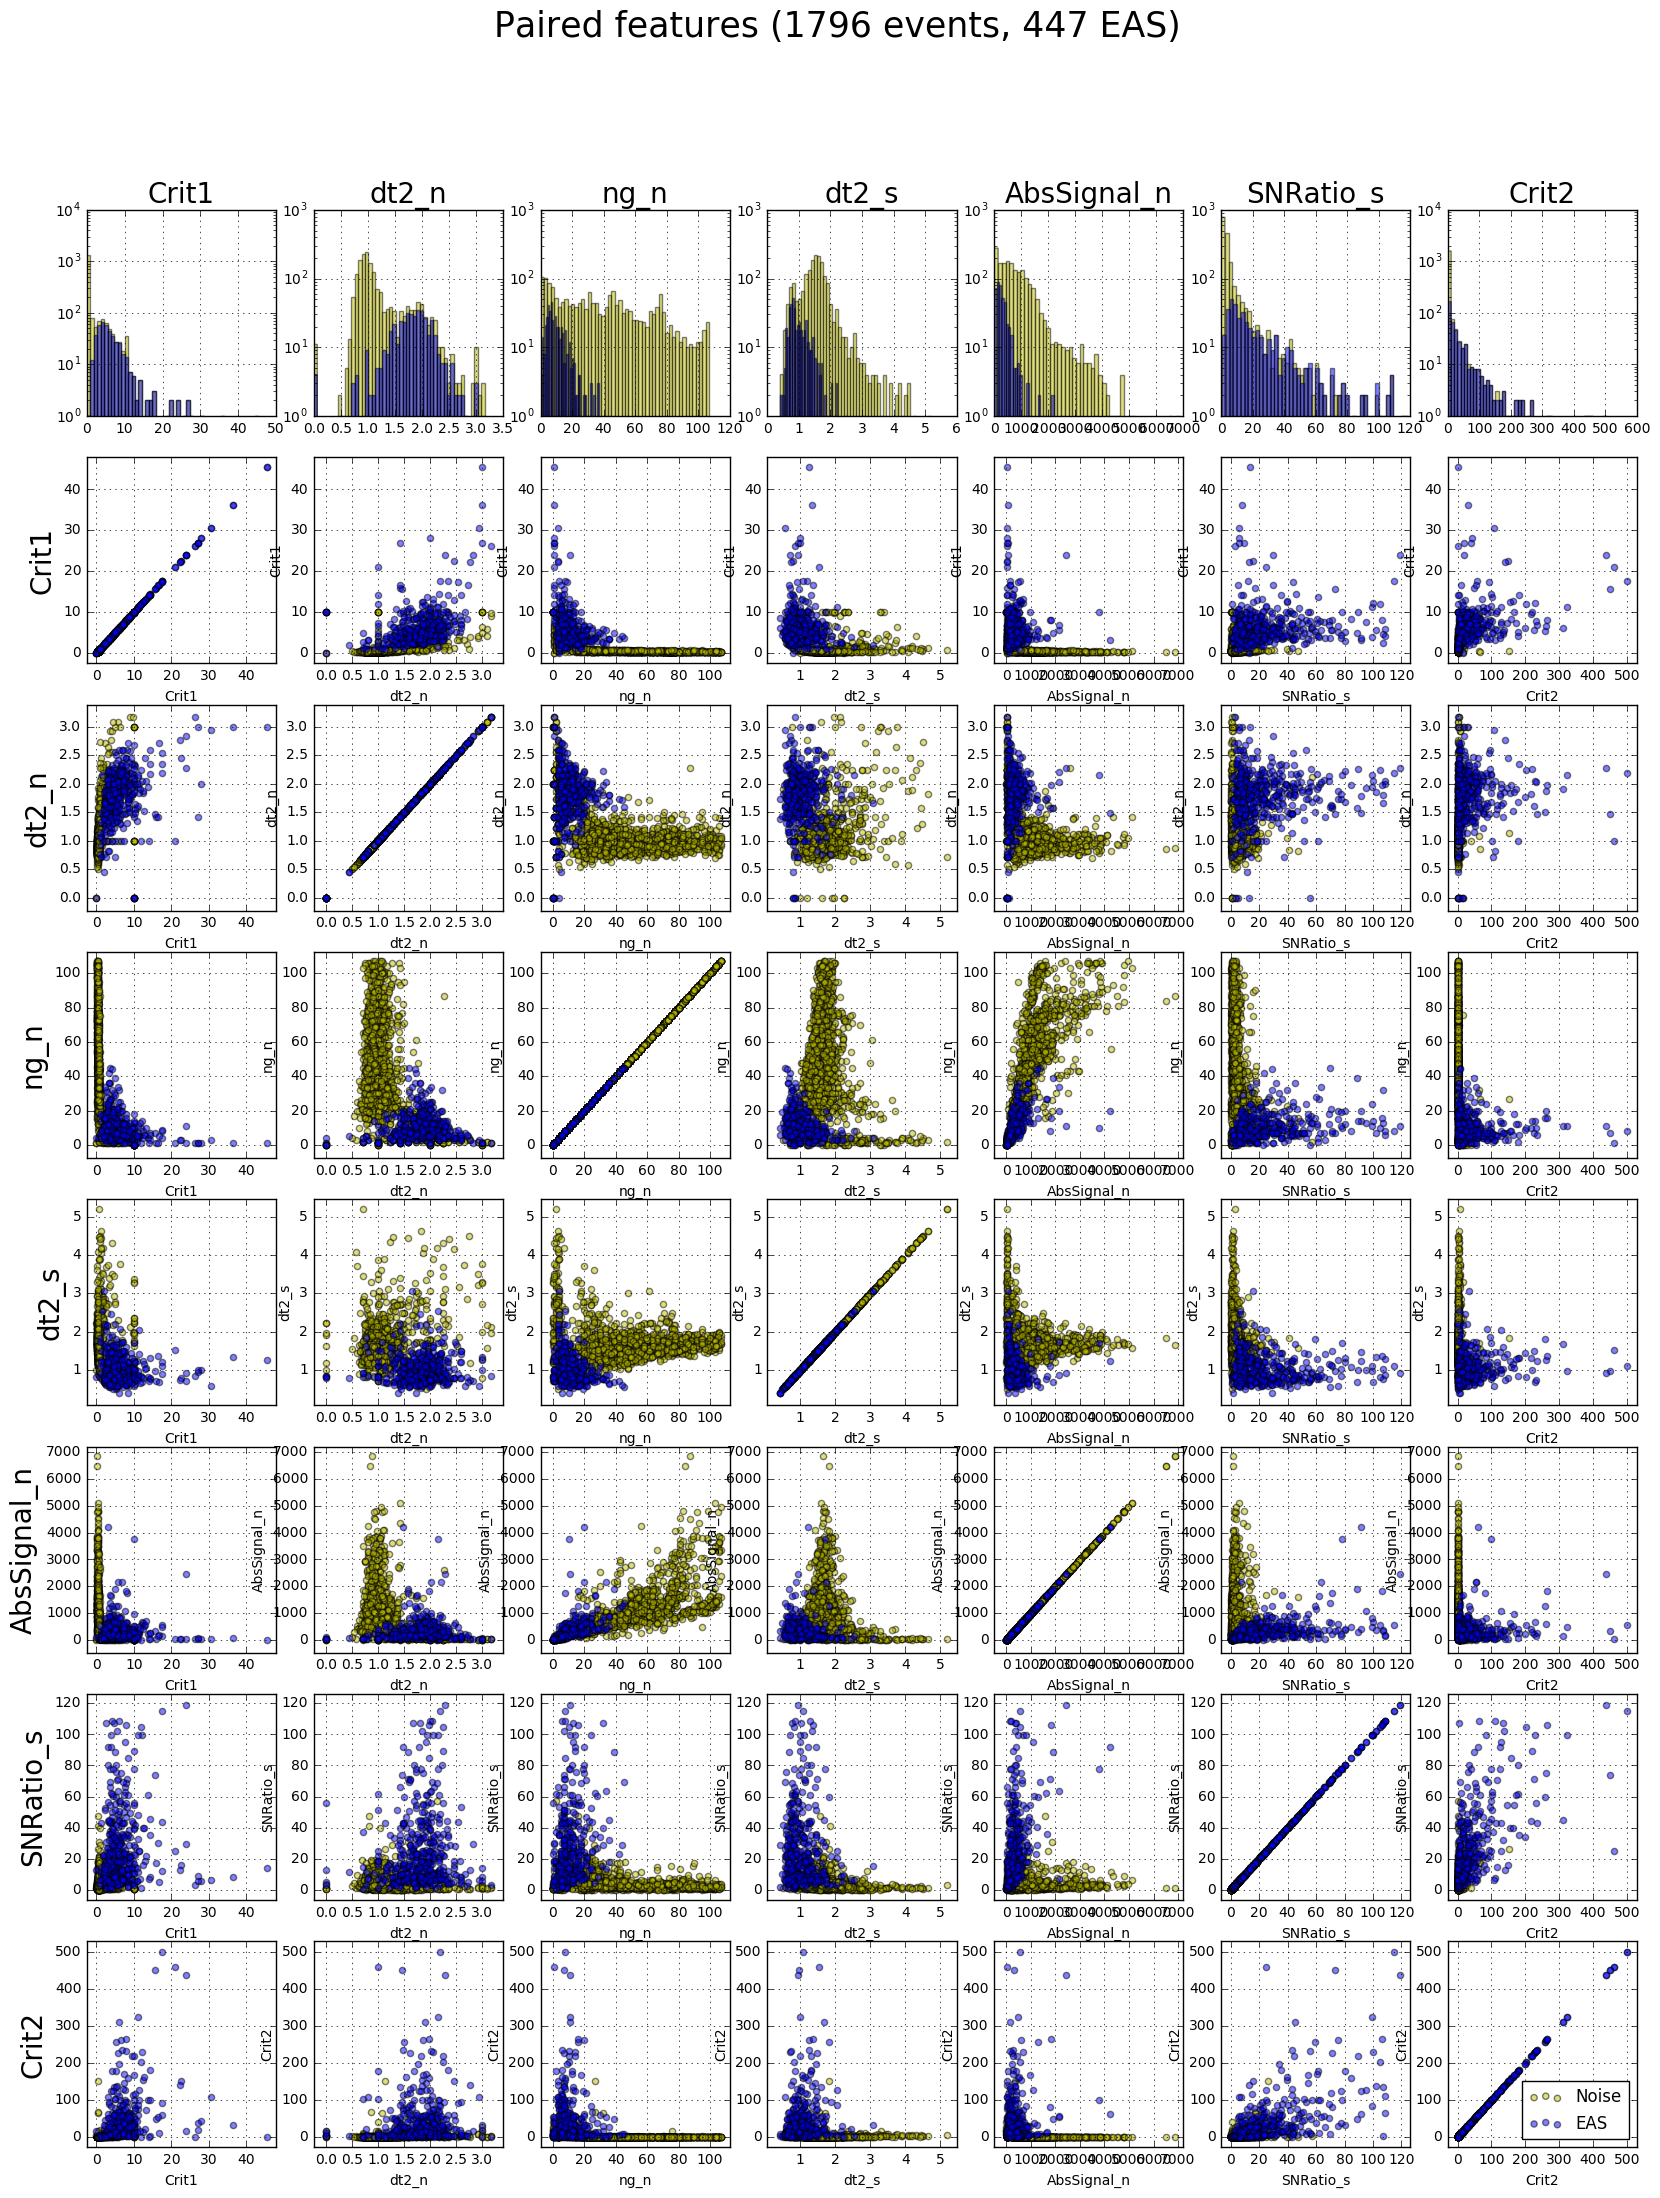

In [130]:
# построим все попарные распределения по признакам с отрезанными выбросами
duo = [[i,j] for j in range(len(param)-1) for i in range(len(param)-1)]
# Parameters
n_classes = 2
plot_colors = "yb"
y = Yset

plt.figure(figsize=(20,25))

for i in range(len(param)-1):
    plt.subplot(len(param),len(param)-1,1+i)
    plt.hist(Xset[features[i]],          bins = 50, alpha = 0.5, color = 'y', label=r"all") #, normed=True)
    plt.hist(Xset[features[i]][Yset==1], bins = 50, alpha = 0.5, color = 'b', label=r"EAS") #, normed=True)
    plt.title(features[i], size = 20)
    plt.yscale('log')
    #plt.axis("tight")
    plt.grid()

for pairidx, pair in enumerate(duo):   
    plt.subplot(len(param),len(param)-1, pairidx + len(param))
    
    # We only take the two corresponding features
    X = Xset[pair]
    y = Yset

    # Plot points
    for i, color in zip(range(n_classes), plot_colors):
        plt.scatter(X[features[pair[0]]][y == i], X[features[pair[1]]][y == i], 
                    c=color, label=target_names[i], cmap=plt.cm.Paired, 
                    alpha = 0.5 )

    plt.xlabel(features[pair[0]])
    plt.ylabel(features[pair[1]])
    if(pairidx%(len(param)-1) == 0):
        plt.ylabel(features[pair[1]], size = 20)
    plt.axis("tight")
    plt.grid()

plt.suptitle("Paired features (1796 events, 447 EAS)", size=25)
plt.legend(loc=4)
plt.show()

###  корреляции параметров с EAS

In [88]:
# считаем корреляции
data.corr(method='pearson')

,EAS,SNRatio_s,SNRatio_n,AbsSignal_s,AbsSignal_n,TotalNoise_s,TotalNoise_n,NNear3,Theta,dt2_s,dt2_n,ng_s,ng_n,Crit1,Crit2
EAS,1.000000,0.278270,-0.176413,0.004016,-0.339366,-0.094599,-0.013794,-0.113005,0.101070,-0.522441,0.613300,-0.097447,-0.549423,0.655540,0.273607
SNRatio_s,0.278270,1.000000,-0.023982,0.023665,-0.077316,-0.032480,-0.001702,0.002184,0.028694,-0.145292,0.174122,0.005845,-0.155301,0.181135,0.739605
SNRatio_n,-0.176413,-0.023982,1.000000,0.008242,0.208567,-0.028620,-0.054421,0.121605,-0.153730,0.027179,-0.173779,0.107656,0.221327,-0.113870,-0.055578
AbsSignal_s,0.004016,0.023665,0.008242,1.000000,0.170246,0.018461,0.024763,0.151436,0.021829,-0.000270,-0.026809,0.159165,0.063759,0.009222,0.269800
AbsSignal_n,-0.339366,-0.077316,0.208567,0.170246,1.000000,-0.010642,-0.066183,0.631661,-0.416593,0.056324,-0.349733,0.612215,0.748454,-0.322867,-0.110703
TotalNoise_s,-0.094599,-0.032480,-0.028620,0.018461,-0.010642,1.000000,0.956699,0.091591,0.283171,0.177175,0.015477,0.111452,0.070022,-0.072065,-0.025837
TotalNoise_n,-0.013794,-0.001702,-0.054421,0.024763,-0.066183,0.956699,1.000000,0.106661,0.336099,0.148659,0.080927,0.130777,-0.011609,0.004559,0.023074
NNear3,-0.113005,0.002184,0.121605,0.151436,0.631661,0.091591,0.106661,1.000000,-0.379336,-0.089013,-0.239072,0.993276,0.723815,-0.151537,0.029821
Theta,0.101070,0.028694,-0.153730,0.021829,-0.416593,0.283171,0.336099,-0.379336,1.000000,0.535947,0.379329,-0.339556,-0.519484,0.226755,0.122288
dt2_s,-0.522441,-0.145292,0.027179,-0.000270,0.056324,0.177175,0.148659,-0.089013,0.535947,1.000000,-0.136961,-0.065010,0.135520,-0.327732,-0.095715


In [84]:
cor = data.corr(method='pearson')
cor_pearson = cor['EAS'].abs().sort_values(ascending=False)
cor_pearson

EAS             1.000000
Crit1           0.655540
dt2_n           0.613300
ng_n            0.549423
dt2_s           0.522441
AbsSignal_n     0.339366
SNRatio_s       0.278270
Crit2           0.273607
SNRatio_n       0.176413
NNear3          0.113005
Theta           0.101070
ng_s            0.097447
TotalNoise_s    0.094599
TotalNoise_n    0.013794
AbsSignal_s     0.004016
Name: EAS, dtype: float64

In [85]:
cor = data.corr(method='spearman')
cor_spearman = cor['EAS'].abs().sort_values(ascending=False)
cor_spearman

EAS             1.000000
Crit1           0.695981
Crit2           0.687095
SNRatio_s       0.658626
TotalNoise_s    0.646612
dt2_n           0.607264
dt2_s           0.599982
ng_n            0.568028
TotalNoise_n    0.557727
SNRatio_n       0.552335
AbsSignal_n     0.446755
Theta           0.244500
NNear3          0.193862
ng_s            0.171192
AbsSignal_s     0.077228
Name: EAS, dtype: float64

In [86]:
cor=data.corr(method='kendall')
cor_kendall = cor['EAS'].abs().sort_values(ascending=False)
cor_kendall

EAS             1.000000
Crit1           0.568471
Crit2           0.561627
SNRatio_s       0.537918
TotalNoise_s    0.528106
dt2_n           0.496699
dt2_s           0.490319
ng_n            0.466708
TotalNoise_n    0.455873
SNRatio_n       0.451465
AbsSignal_n     0.364871
Theta           0.203164
NNear3          0.159846
ng_s            0.141157
AbsSignal_s     0.063073
Name: EAS, dtype: float64

In [52]:
# параметры в порядке уменьшения модуля корреляции с EAS
# param = ['EAS', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'SNRatio_n', 'NNear3', 'ng_s','Theta']
param = ['EAS', 'Crit1', 'dt2_n', 'ng_n','dt2_s', 'AbsSignal_n', 'SNRatio_s', 'Crit2','SNRatio_n']
sixx = data[param]
sixx.corr()
#sixx.corr(method='kendall')
#cor=sixx.corr(method='spearman')
cor=sixx.corr()
cor=cor['EAS']
print (cor)

EAS            1.000000
Crit1          0.641394
dt2_n          0.597440
ng_n          -0.533730
dt2_s         -0.496486
AbsSignal_n   -0.330809
SNRatio_s      0.270871
Crit2          0.265153
SNRatio_n     -0.171614
Name: EAS, dtype: float64


In [96]:
param = data.axes
param

[Int64Index([10675, 10677, 10679, 10681, 10683, 10685, 10687, 10689, 10691,
             10693,
             ...
             14468, 14470, 14472, 14474, 14476, 14478, 14480, 14482, 14484,
             14486],
            dtype='int64', name='nev', length=1911),
 Index(['EAS', 'SNRatio_s', 'SNRatio_n', 'AbsSignal_s', 'AbsSignal_n',
        'TotalNoise_s', 'TotalNoise_n', 'NNear3', 'Theta', 'dt2_s', 'dt2_n',
        'ng_s', 'ng_n', 'Crit1', 'Crit2'],
       dtype='object')]

# Методы ML

## Метод решающих деревьев

### Полное дерево

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
featur = list(cor_pearson.axes)
featur

[Index(['EAS', 'Crit1', 'dt2_n', 'ng_n', 'dt2_s', 'AbsSignal_n', 'SNRatio_s',
        'Crit2', 'SNRatio_n', 'NNear3', 'Theta', 'ng_s', 'TotalNoise_s',
        'TotalNoise_n', 'AbsSignal_s'],
       dtype='object')]

In [209]:
features = [ 'dt2_n', 'ng_n', 'dt2_s', 'AbsSignal_n', 'SNRatio_s',
        'Crit2', 'SNRatio_n', 'NNear3', 'Theta', 'ng_s', 'Crit1', 'AbsSignal_s','TotalNoise_s',
        'TotalNoise_n']
X = data[features]
print('events', len(X))
#X[:3]
type(features)

events 1911


list

In [210]:
Y = data['EAS']
len(Y)

1911

In [211]:
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [218]:
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print("%15s   %f" % (features[i], importances[i]))

          dt2_n   0.002231
           ng_n   0.001427
          dt2_s   0.005831
    AbsSignal_n   0.000000
      SNRatio_s   0.013776
          Crit2   0.007101
      SNRatio_n   0.000000
         NNear3   0.002379
          Theta   0.002141
           ng_s   0.001421
          Crit1   0.774521
    AbsSignal_s   0.179742
   TotalNoise_s   0.009432
   TotalNoise_n   0.000000


### Построение дерева

In [182]:
clf.decision_path(X)

<1911x35 sparse matrix of type '<class 'numpy.int64'>'
	with 9579 stored elements in Compressed Sparse Row format>

In [183]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree_full.dot')  

In [184]:
# create png
from IPython.display import Image  
import pydotplus 

target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png()) 
#graph.write_png("tree.png")

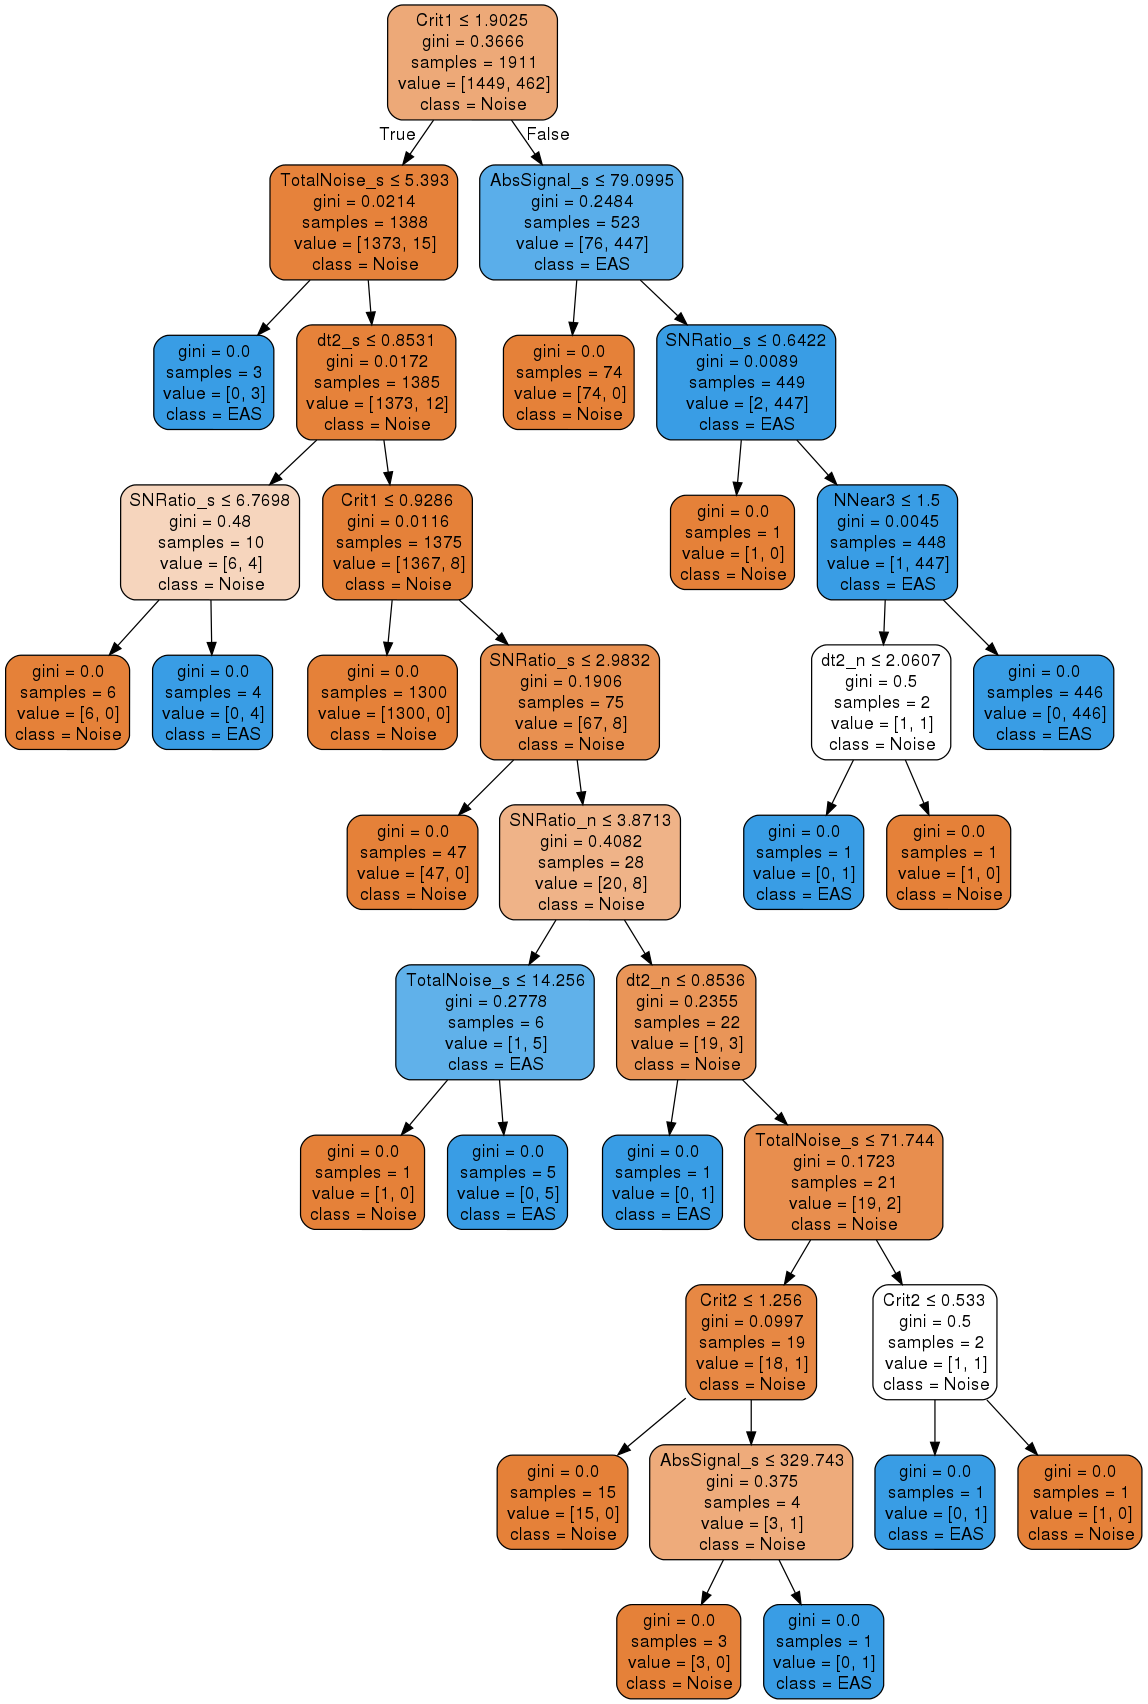

In [185]:
# нарисовать дерево через танец с бубнами
graph.write_svg("tree_full.svg")
!rsvg tree_full.svg tree_full0.png
Image("tree_full0.png") 

In [195]:
# 
clf.score(X,Y)

1.0

In [196]:
clf.apply(X)

array([34, 34,  8, ...,  8,  8,  8])

### Уменьшим количество признаков

In [205]:
features = param [1:6]
X = data[features]
Y = data['EAS']
# Обучим решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.
clf = DecisionTreeClassifier(random_state=20,max_leaf_nodes=8, min_samples_leaf=2)
clf.fit(X, Y)
# Вычислим важности признаков и найдем признаки с наибольшей важностью. 
importances = clf.feature_importances_
for i in range(len(importances)):
    print("%20s   %7f" % (features[i], importances[i]))

               Crit1   0.844822
               dt2_n   0.011200
                ng_n   0.000000
               dt2_s   0.006641
         AbsSignal_n   0.137337


In [38]:
# построим дерево по 5 признакам
clf.decision_path(X)
tree.export_graphviz(clf, out_file='tree.dot')  
target_names = ['Noise','EAS']
dot_data = tree.export_graphviz(clf, out_file=None, 
                feature_names=features,  
                class_names=target_names,  
                filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree5-8-2.png")
#graph.write_pdf("tree5-8-2.pdf")
#Image(graph.create_png())  

# ESLE

In [39]:
clf.score(X,Y)

0.97120418848167545

In [40]:
clf.apply(X)

array([ 9,  9, 12, ..., 12, 12, 12])

In [41]:
XX = clf._validate_X_predict(X, check_input=True)

#tr = clf.tree_.decision_path(XX)
print(XX)

[[  1.80277598e+00   3.20000000e+01   7.66964972e-01   3.75484985e+02
    1.07211700e+02]
 [  1.51910901e+00   1.30000000e+01   1.15727496e+00   2.49740005e+02
    1.34922104e+01]
 [  1.05830097e+00   2.50000000e+01   2.93987393e+00   2.18917999e+02
    1.01800203e-01]
 ..., 
 [  1.06542695e+00   3.70000000e+01   1.42427897e+00   5.49817017e+02
    4.12749195e+00]
 [  9.22531188e-01   4.70000000e+01   1.17513895e+00   1.02392200e+03
    9.57330513e+00]
 [  1.00000000e+00   9.00000000e+01   1.36872900e+00   1.26865405e+03
    1.71050091e+01]]


In [44]:
Z=clf.predict_proba(X)
Z

array([[ 0.02955665,  0.97044335],
       [ 0.02955665,  0.97044335],
       [ 0.98561151,  0.01438849],
       ..., 
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849],
       [ 0.98561151,  0.01438849]])

In [45]:
len(Z[:])

1910

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
print( '\nclf Attributes...' )
for atttribute in dir( clf ):
    if atttribute[0] != '_':
        print( atttribute, ':', getattr( clf , atttribute ) )